In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
from collections import OrderedDict
import datetime
import time
import matplotlib.pyplot as plt
from etf_tools import ez_plot
from etf_tools.utils import evaluate_price, evaluate_updown
plt.style.use('ggplot')
plt.ioff()

In [24]:
module = 'delay'
metrics_file = f'modeling/{module}/evaluate/metrics.csv'
col_types = OrderedDict(code=str, datemark=str, etf_score=float)

metrics = pd.read_csv(metrics_file, dtype=col_types)

metrics.tail()

,code,datemark,etf_score
5442,006208,20180511,0.592625
5443,00690,20180511,0.695206
5444,00692,20180511,0.696137
5445,00701,20180511,0.794300
5446,00713,20180511,0.894097


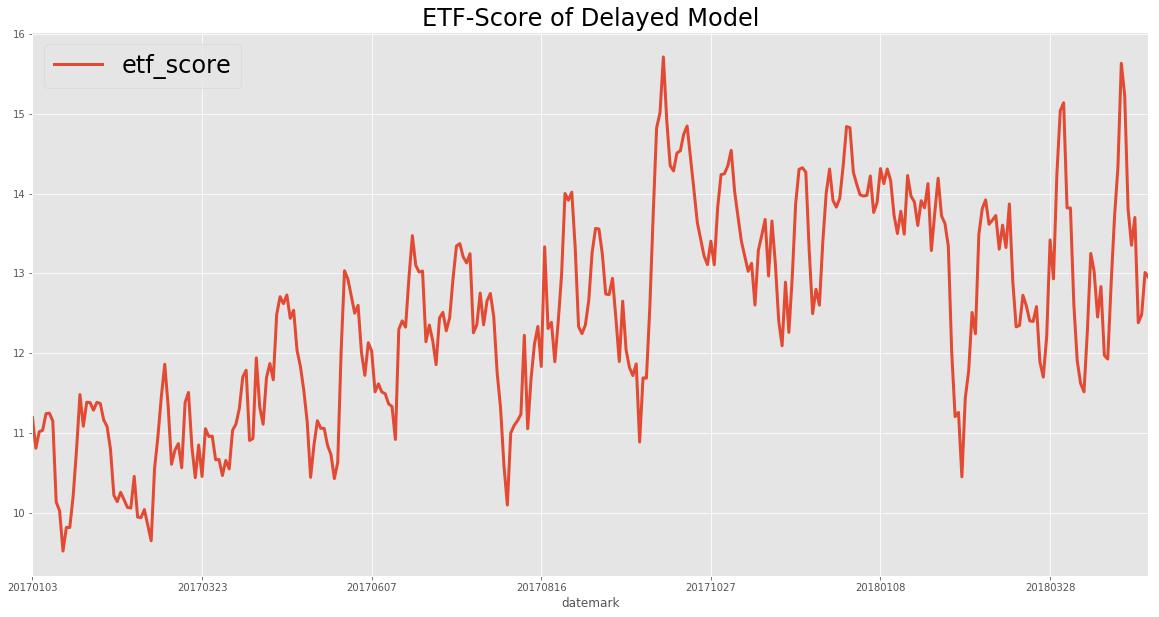

In [25]:
fig = ez_plot(metrics[['datemark', 'etf_score']].groupby('datemark').sum(), linewidth=3,
              legend_prop={'loc': 'upper left', 'fontsize': 24},
              title_prop={'label': 'ETF-Score of Delayed Model', 'fontsize': 24})

display(fig)
fig.savefig('static/etf_score_delayed_model.jpg')

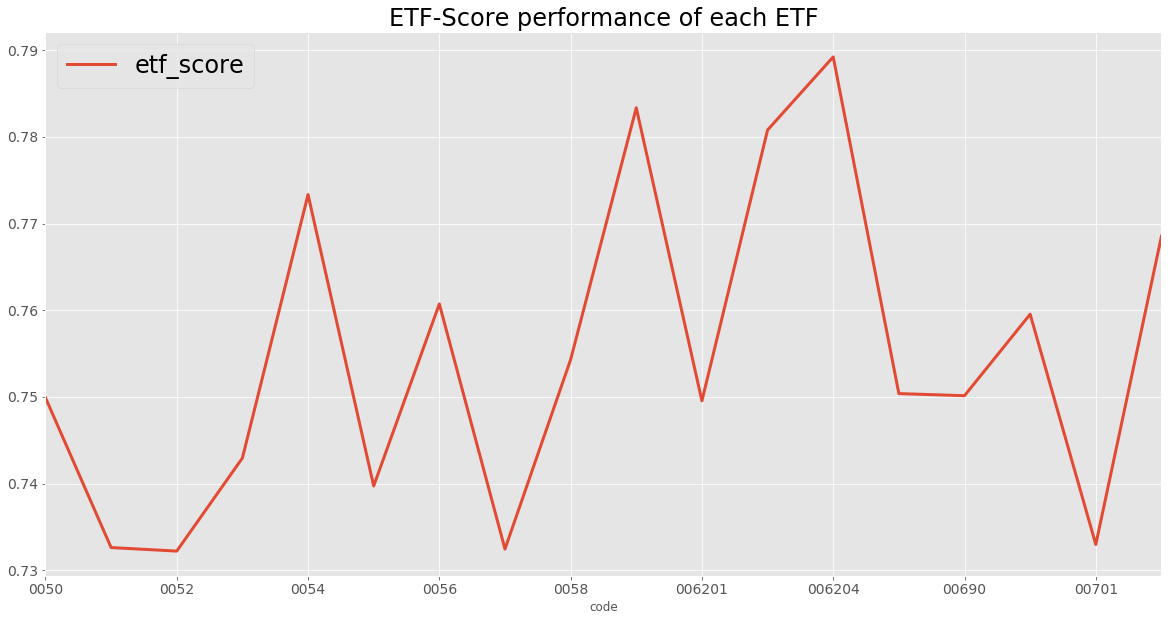

In [28]:
fig = ez_plot(metrics[['code', 'etf_score']].groupby('code').mean(),
              linewidth=3, fontsize=14,
              legend_prop={'loc': 'upper left', 'fontsize': 24},
              title_prop={'label': 'ETF-Score performance of each ETF', 'fontsize': 24})

display(fig)
fig.savefig('static/etf_score_performance_group_by_etf.jpg')

In [23]:
def trend(etf, short_term_days=5, long_term_days=20):
    trend_up = 1 * (etf.close.rolling(short_term_days, 0).max() - etf.close.rolling(long_term_days, 0).max().shift(short_term_days) > 0)
    trend_down = 1 * (etf.close.rolling(short_term_days, 0).min() - etf.close.rolling(long_term_days, 0).min().shift(short_term_days) < 0)
    trend_up.name = 'trend_up'
    trend_down.name = 'trend_down'
    norm_close = etf.close / etf.close.max()
    df = pd.concat([norm_close, trend_up, trend_down], axis=1)
    df.set_index(etf.date.apply(lambda e: str(e)), inplace=True)
    
    return df

In [29]:
src_dir = '../data/raw/groupbycode/trainingset/%(code)s.csv'


In [10]:
col_dtypes = OrderedDict(code=str, date=str, name=str, open=float, high=float, low=float, close=float, volume=int)
tetfp = pd.read_csv('../data/raw/tetfp.csv', names=col_dtypes.keys(), dtype=col_dtypes, skiprows=1)
tetfp.set_index()
display(tetfp.tail())
codes = tetfp.code.unique()


,code,date,name,open,high,low,close,volume
19302,00713,20180514,元大台灣高息低波,30.78,30.85,30.78,30.85,38
19303,00713,20180515,元大台灣高息低波,30.72,30.82,30.72,30.80,9
19304,00713,20180516,元大台灣高息低波,30.73,30.82,30.73,30.80,116
19305,00713,20180517,元大台灣高息低波,30.95,30.97,30.89,30.92,27
19306,00713,20180518,元大台灣高息低波,30.95,30.96,30.92,30.96,11


In [34]:
etf = pd.read_csv(src_dir % dict(code=codes[0]))

etf.tail()

,code,date,name,open,high,low,close,volume,weekday,ema12,...,atr_std_20,vr,obv,obv_ma12,obv_ma12_diff,y_1,y_2,y_3,y_4,y_5
1312,50,20180514,元大台灣50,82.00,82.6,81.90,82.50,17197,1,80.618579,...,-1.205350,1.534479,1556781,1.515285e+06,41496.250000,81.65,81.75,81.20,80.95,NaN
1313,50,20180515,元大台灣50,82.35,82.4,81.65,81.65,7222,2,80.777259,...,-1.106647,1.772122,1549559,1.519804e+06,29755.500000,81.75,81.20,80.95,NaN,NaN
1314,50,20180516,元大台灣50,81.45,81.8,81.40,81.75,8293,3,80.926911,...,-1.153772,1.735184,1557852,1.523980e+06,33871.583333,81.20,80.95,NaN,NaN,NaN
1315,50,20180517,元大台灣50,81.95,82.0,81.20,81.20,1940,4,80.968925,...,-1.122942,1.614290,1555912,1.527453e+06,28459.333333,80.95,NaN,NaN,NaN,NaN
1316,50,20180518,元大台灣50,81.20,81.5,80.85,80.95,2360,5,80.966013,...,-0.903089,1.710301,1553552,1.531188e+06,22364.333333,NaN,NaN,NaN,NaN,NaN


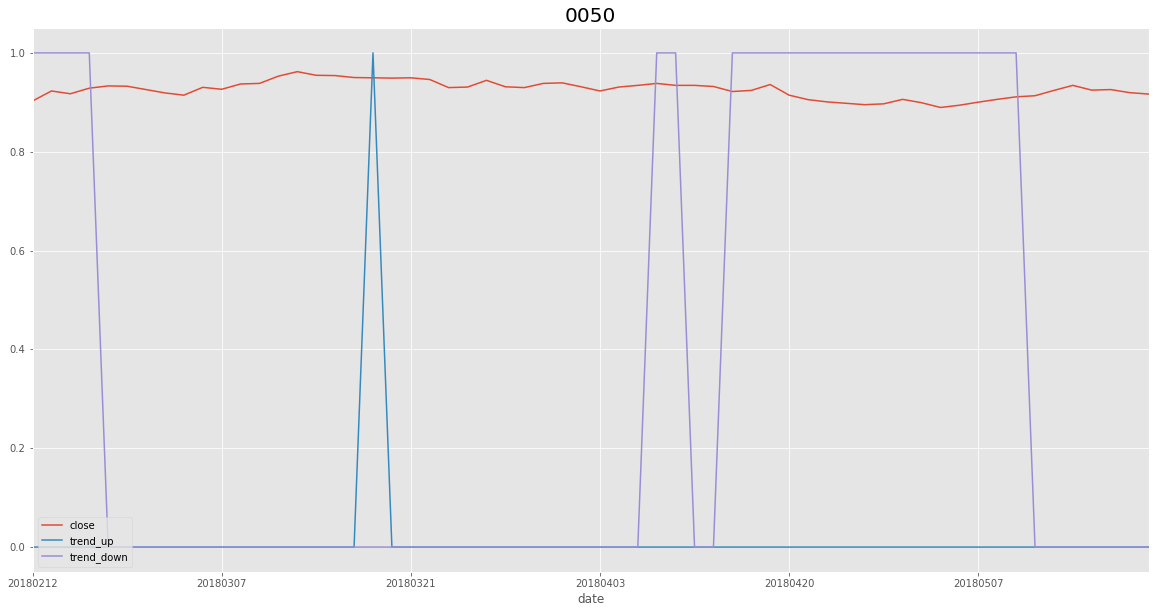

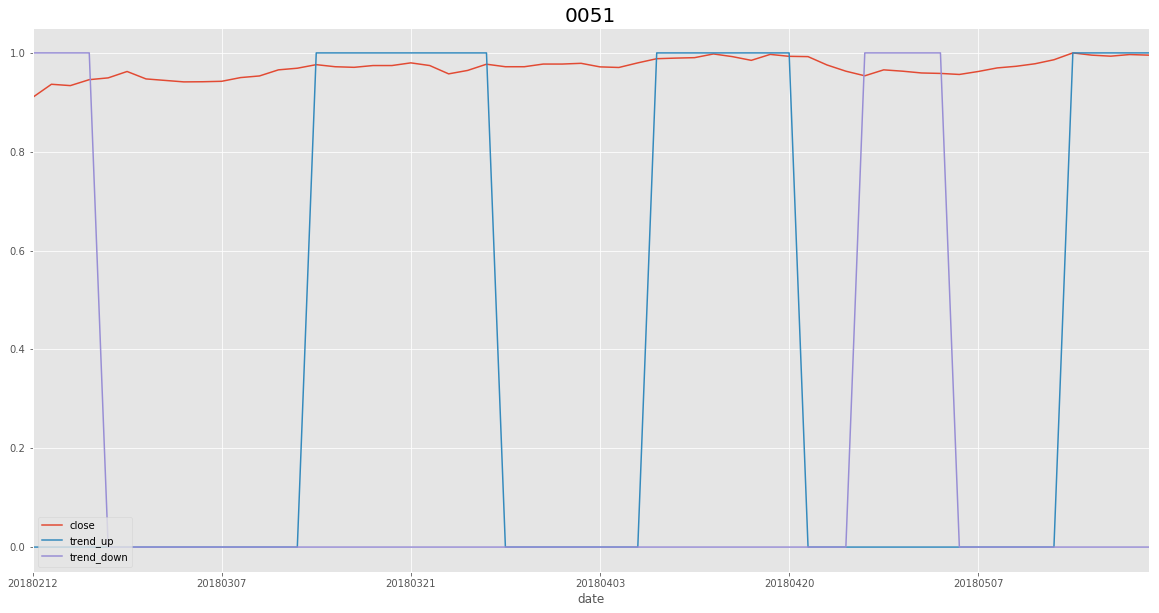

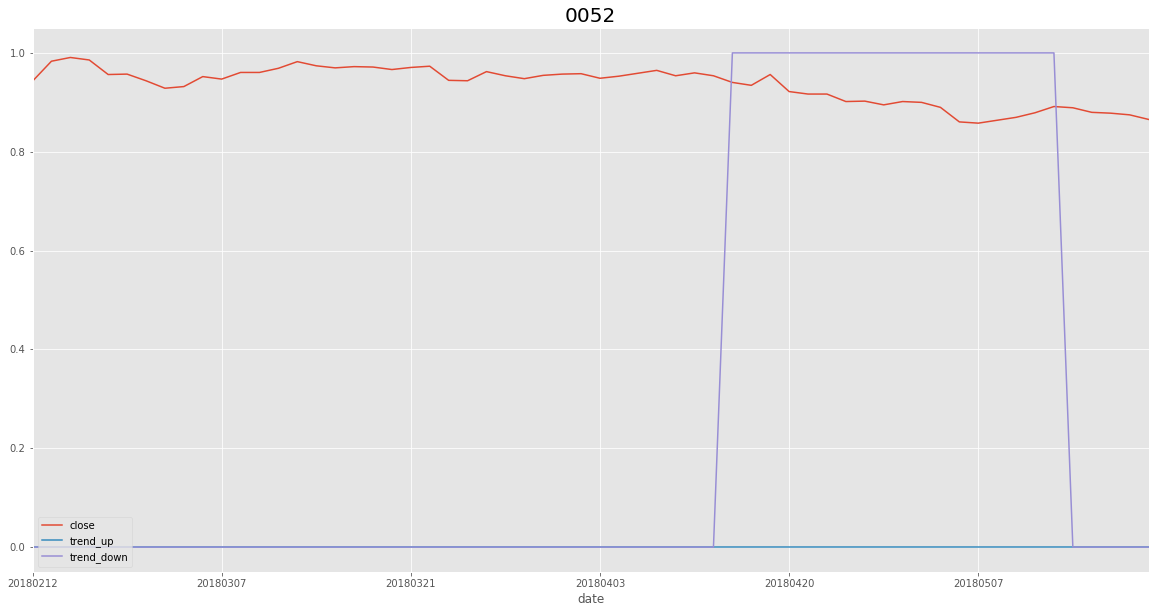

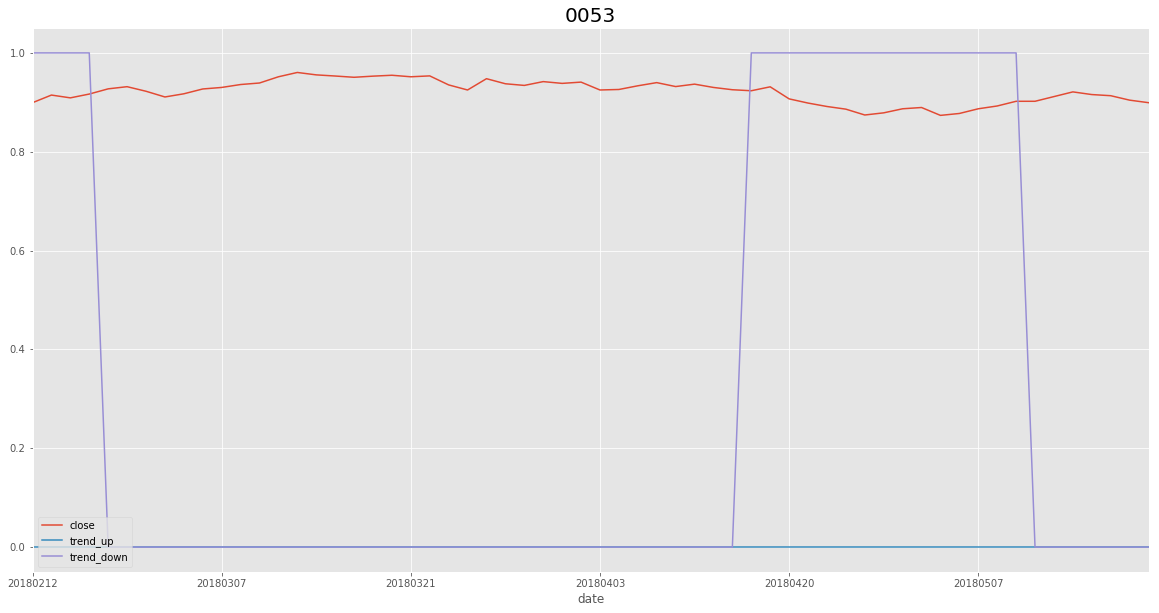

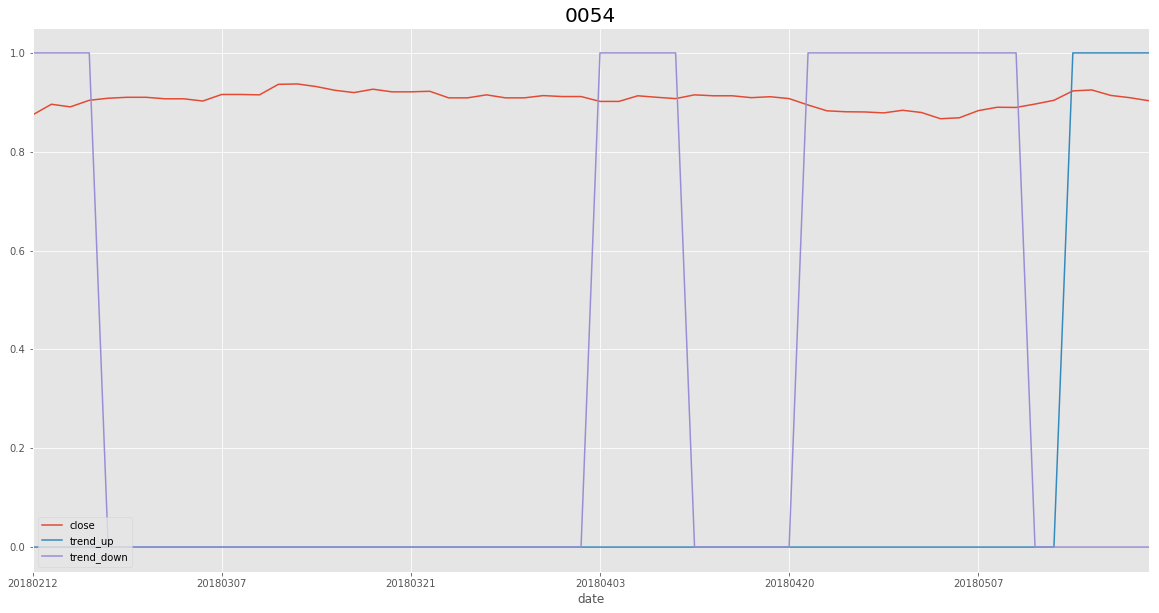

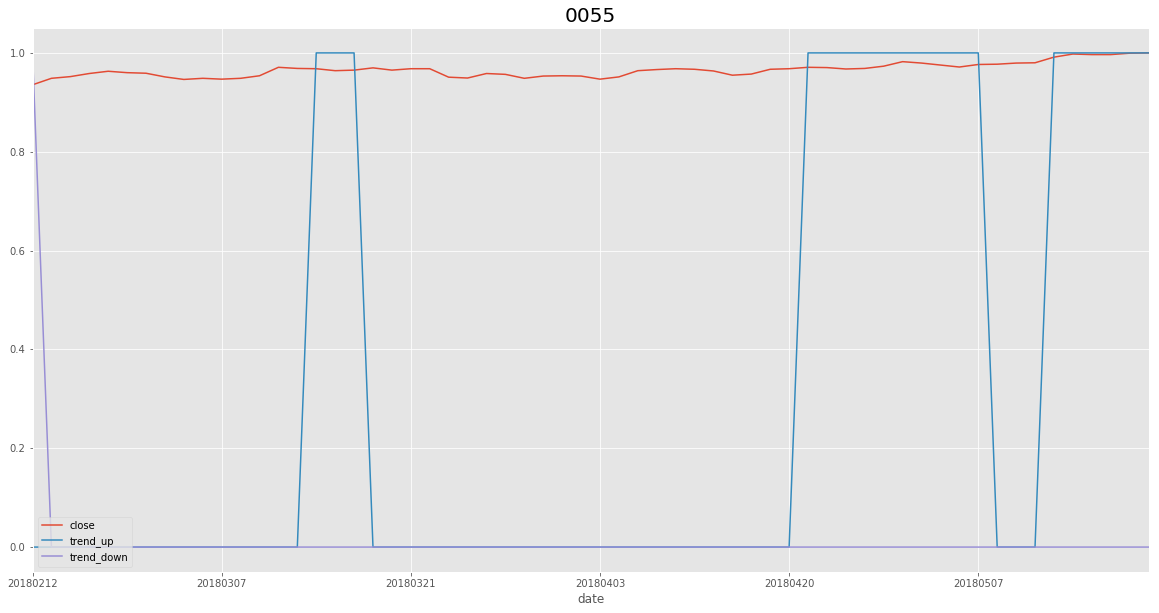

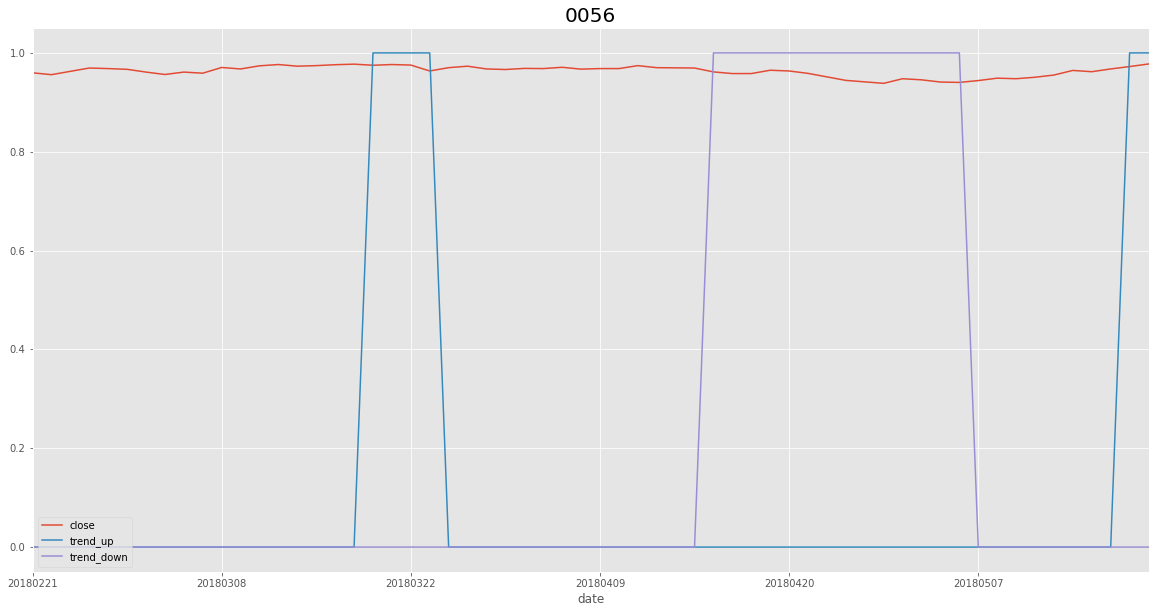

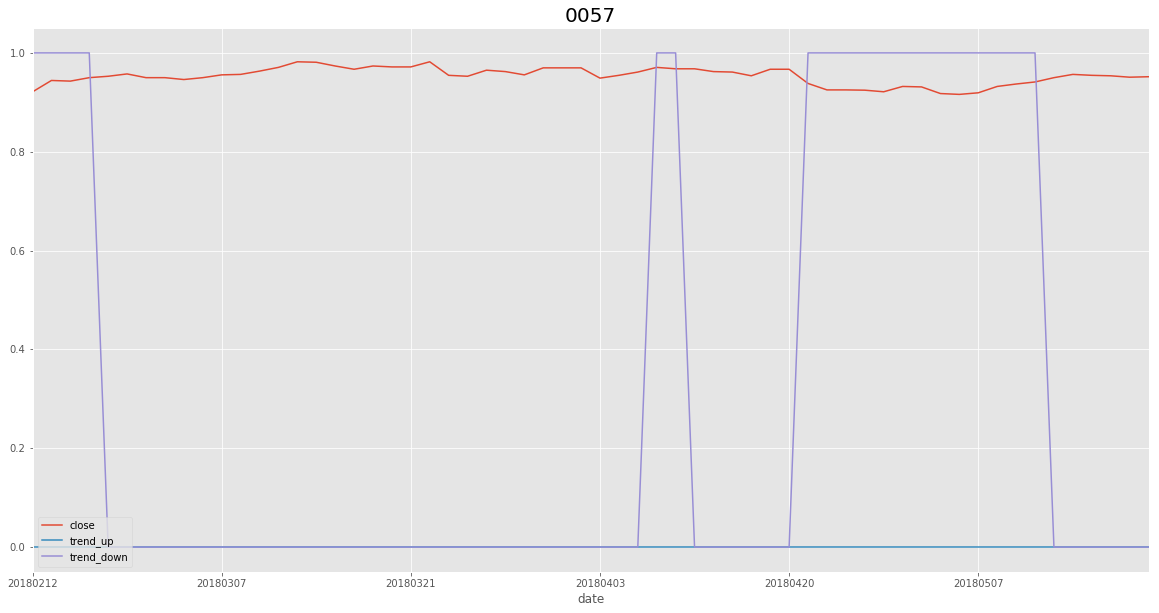

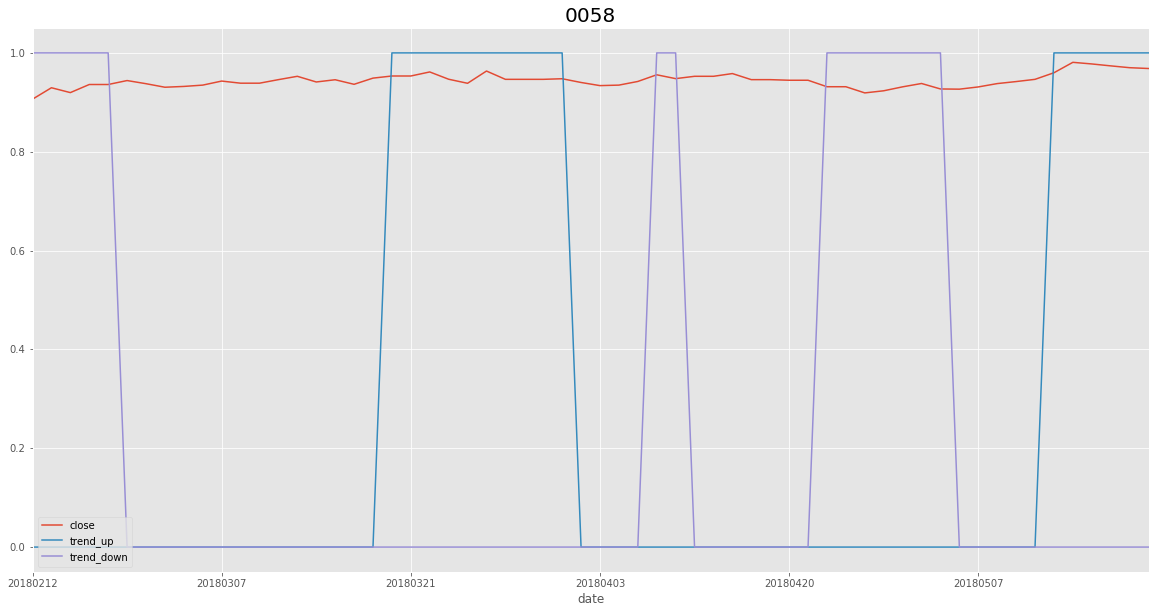

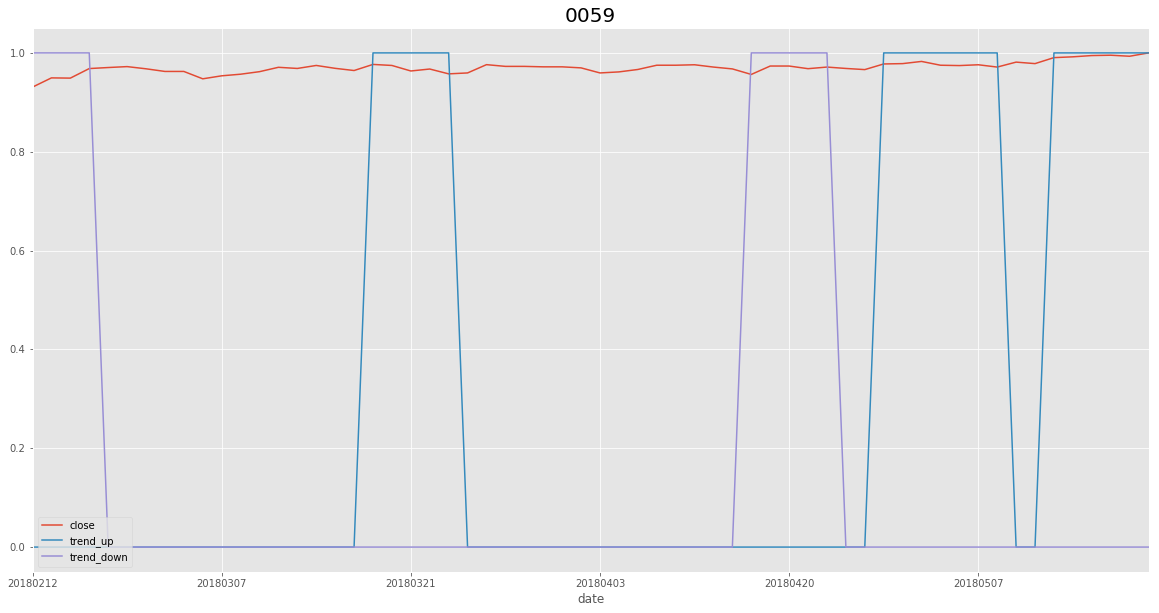

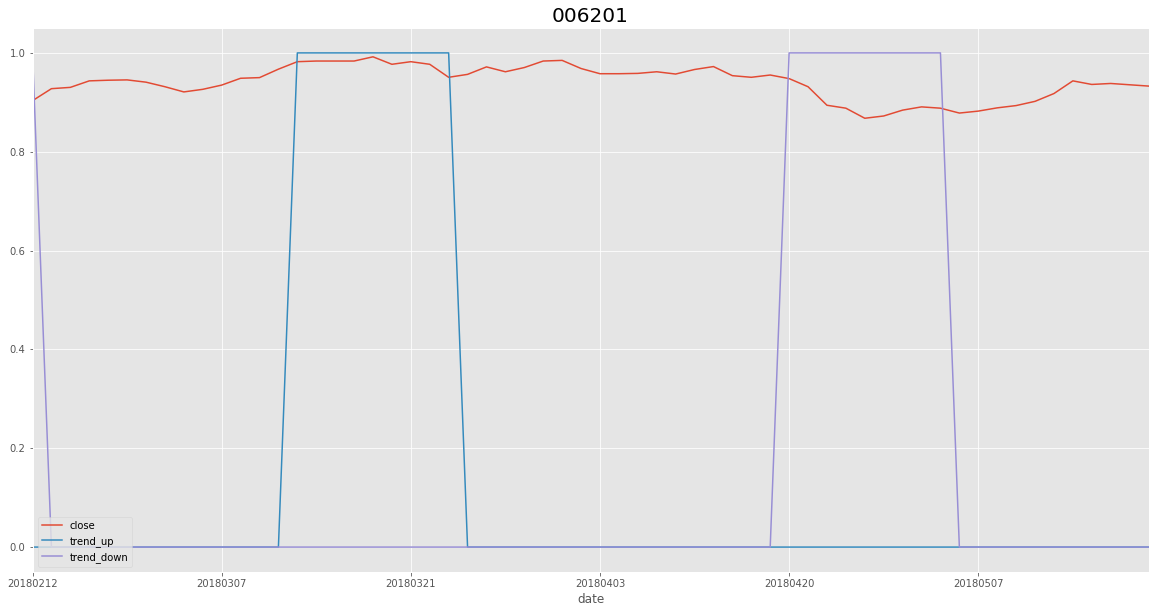

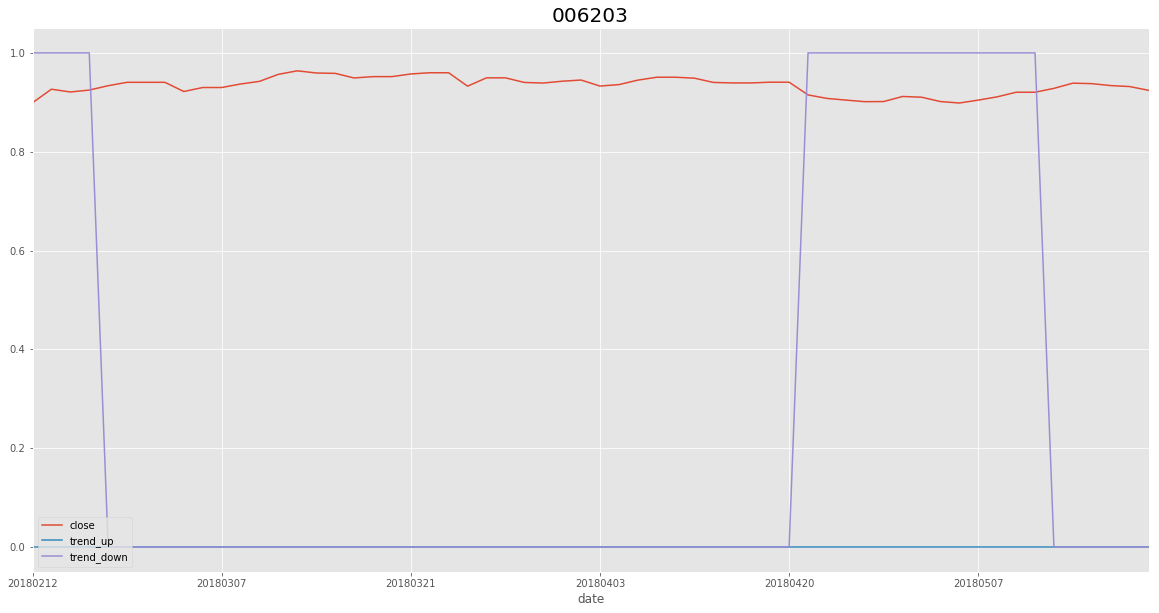

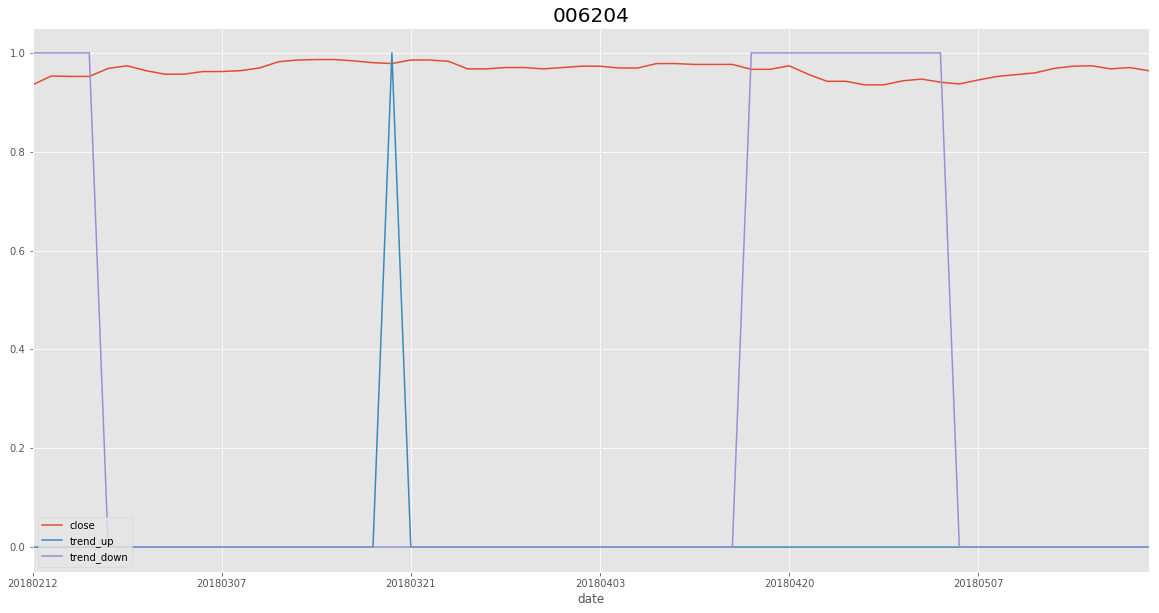

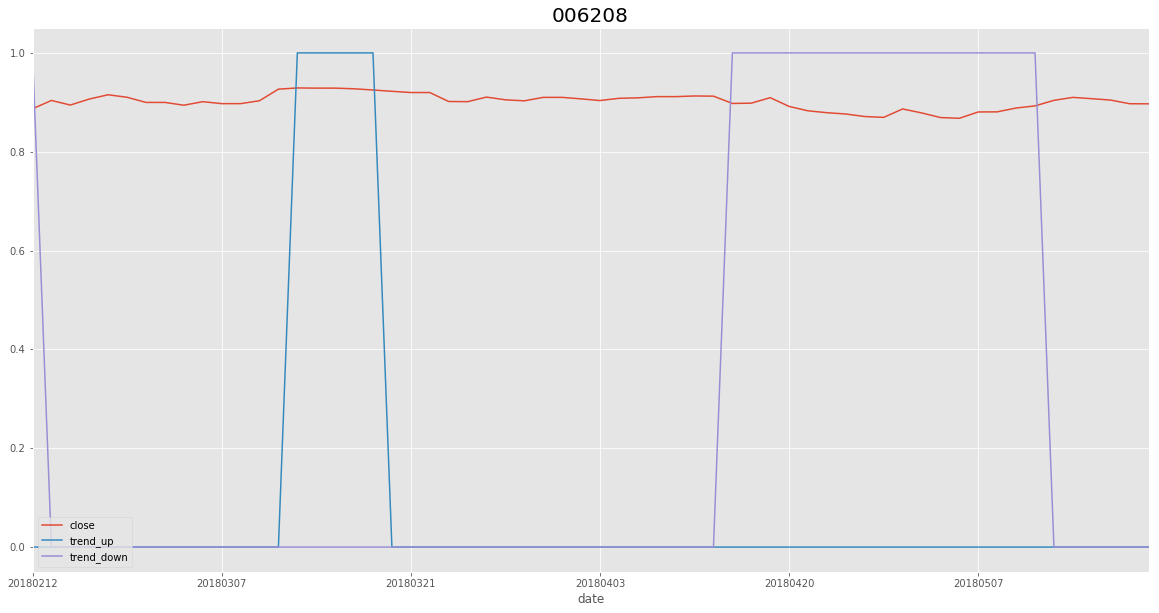

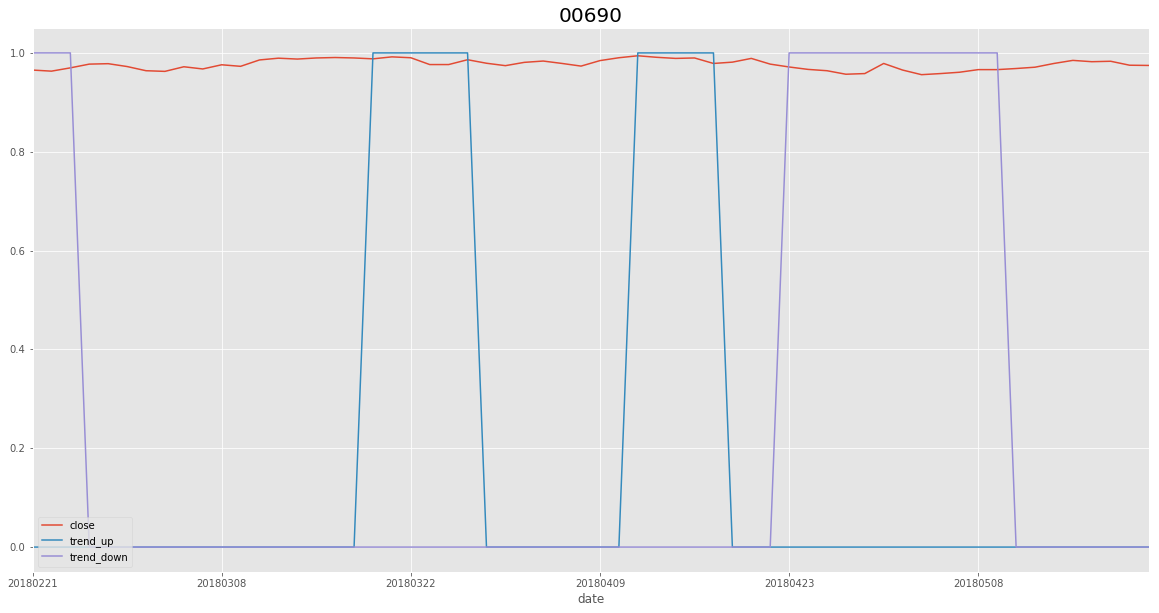

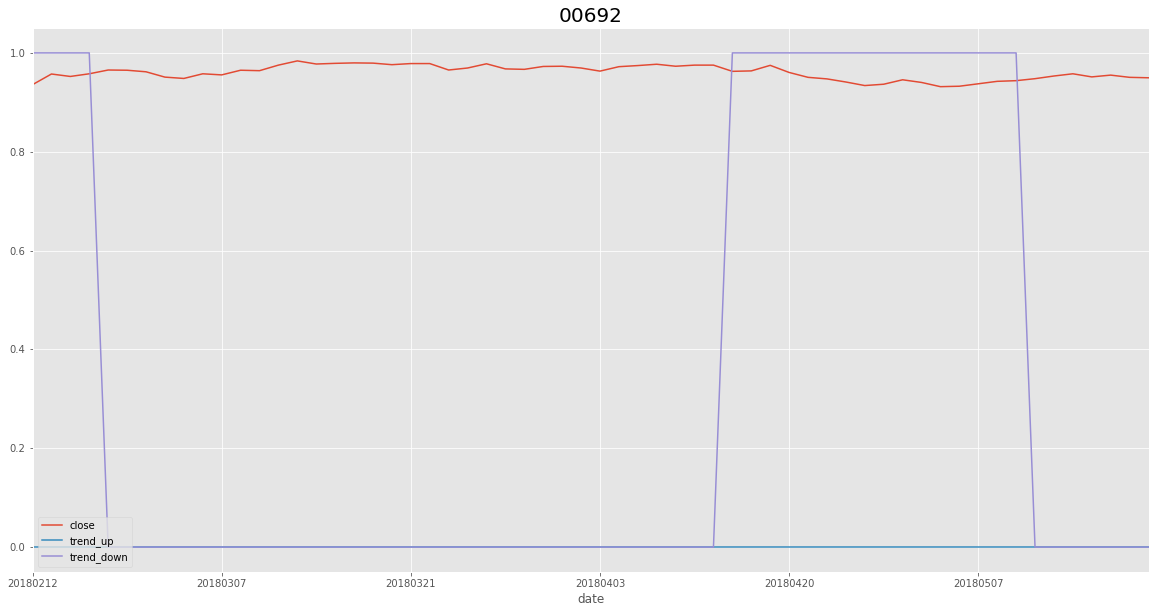

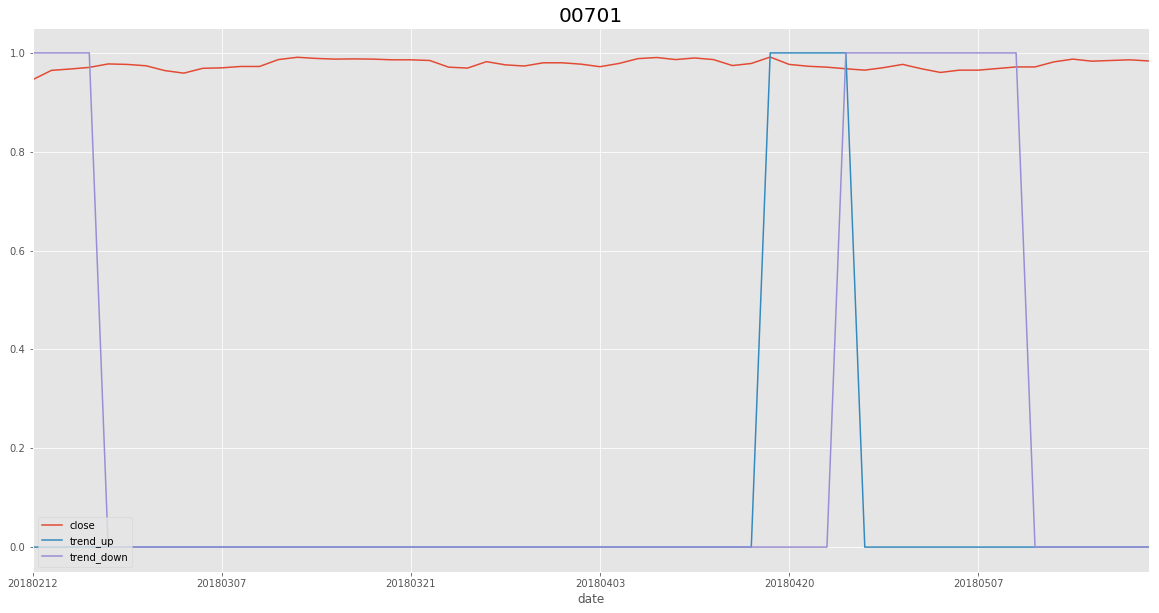

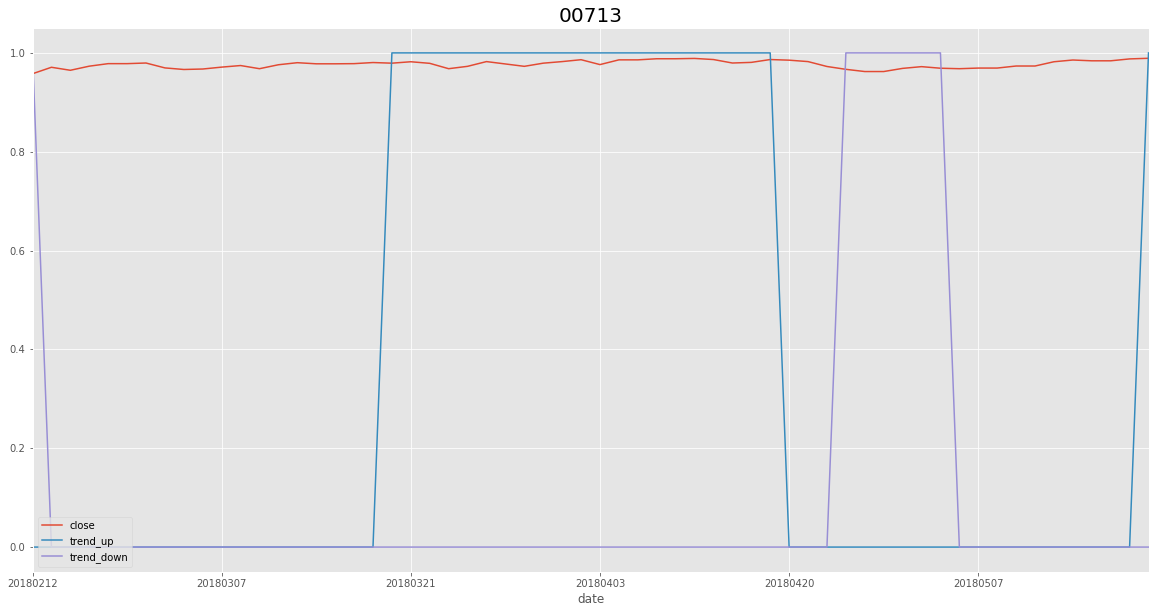

In [48]:
#

figs = []
for code in codes:
    etf = pd.read_csv(src_dir % dict(code=code))

    fig = ez_plot(trend(etf)[-60:],
                  legend_prop={'loc': 'lower left'},
                  title_prop={'label': f'{code}', 'size': 20})
    figs.append(fig)
    
    display(fig)